# Using the Random Forests Classifier to Predict Stock Price for the following Day

In this project, we will use the machine learning random forests classifier to predict the movement of stock prices for the following day.

Random forests is a classification algorithm consisting of multiple decision trees which are merged together for a more accurate prediction.

In [ ]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 KB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 KB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 52.4 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import datetime as dt
import yfinance as yf

In [ ]:
# initialise a ticker class to download S&P500 data then query historical prices
sp500 = yf.Ticker('^GSPC')
sp500 = sp500.history(period="max", interval="1d")
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2022-12-27 00:00:00-05:00,3843.340088,3846.649902,3813.219971,3829.250000,3030300000,0.0,0.0
2022-12-28 00:00:00-05:00,3829.560059,3848.320068,3780.780029,3783.219971,3083520000,0.0,0.0
2022-12-29 00:00:00-05:00,3805.449951,3858.189941,3805.449951,3849.280029,3003680000,0.0,0.0


In [ ]:
# set and observe index
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2022-12-19 00:00:00-05:00', '2022-12-20 00:00:00-05:00',
               '2022-12-21 00:00:00-05:00', '2022-12-22 00:00:00-05:00',
               '2022-12-23 00:00:00-05:00', '2022-12-27 00:00:00-05:00',
               '2022-12-28 00:00:00-05:00', '2022-12-29 00:00:00-05:00',
               '2022-12-30 00:00:00-05:00', '2023-01-03 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=23866, freq=None)

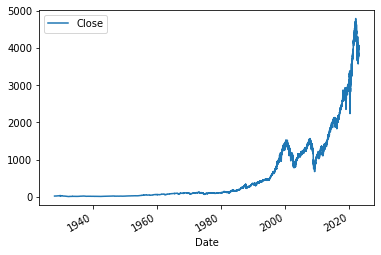

In [ ]:
# plot closing price
sp500.plot.line(y="Close", use_index=True)

In [ ]:
# delete useless columns
del sp500["Dividends"]
del sp500["Stock Splits"]

In [ ]:
# set up target i.e. what we will be predicting
sp500['Tomorrow'] = sp500["Close"].shift(-1)
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2022-12-27 00:00:00-05:00,3843.340088,3846.649902,3813.219971,3829.250000,3030300000,3783.219971
2022-12-28 00:00:00-05:00,3829.560059,3848.320068,3780.780029,3783.219971,3083520000,3849.280029
2022-12-29 00:00:00-05:00,3805.449951,3858.189941,3805.449951,3849.280029,3003680000,3839.500000


In [ ]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2022-12-27 00:00:00-05:00,3843.340088,3846.649902,3813.219971,3829.250000,3030300000,3783.219971,0
2022-12-28 00:00:00-05:00,3829.560059,3848.320068,3780.780029,3783.219971,3083520000,3849.280029,1
2022-12-29 00:00:00-05:00,3805.449951,3858.189941,3805.449951,3849.280029,3003680000,3839.500000,0


In [ ]:
# set start date to 1990
sp500 = sp500.loc["1990-01-01":].copy()
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2022-12-27 00:00:00-05:00,3843.340088,3846.649902,3813.219971,3829.250000,3030300000,3783.219971,0
2022-12-28 00:00:00-05:00,3829.560059,3848.320068,3780.780029,3783.219971,3083520000,3849.280029,1
2022-12-29 00:00:00-05:00,3805.449951,3858.189941,3805.449951,3849.280029,3003680000,3839.500000,0


In [ ]:
# training an initial machine learning model
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=800, min_samples_split=250, random_state=1)

train = sp500[:-100]
test = sp500.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=250, n_estimators=800, random_state=1)

In [ ]:
# get predictions
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
preds

Date
2022-08-11 00:00:00-04:00    0
2022-08-12 00:00:00-04:00    1
2022-08-15 00:00:00-04:00    1
2022-08-16 00:00:00-04:00    1
2022-08-17 00:00:00-04:00    1
                            ..
2022-12-27 00:00:00-05:00    1
2022-12-28 00:00:00-05:00    1
2022-12-29 00:00:00-05:00    1
2022-12-30 00:00:00-05:00    1
2023-01-03 00:00:00-05:00    1
Length: 100, dtype: int64

In [ ]:
# output precision score (if less than 50 = bad model)
precision_score(test["Target"], preds)*100

39.130434782608695

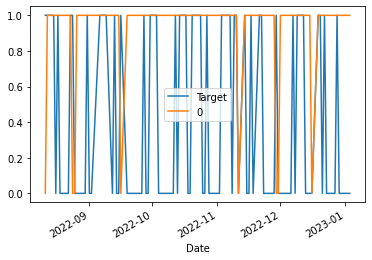

In [ ]:
# plot predicts

# combine actual values with predicted values
combine = pd.concat([test["Target"], preds], axis=1)
combine.plot()

# Building a Backtesting System

In [ ]:
# create predictions function
def predict(train, test, predictors, model):
  model.fit(train[predictors], train["Target"])
  preds = model.predict(test[predictors])
  preds = pd.Series(preds, index=test.index, name="Predictions")
  combined = pd.concat([test["Target"], preds], axis=1)
  return combined

In [ ]:
# create backtest function
def backtest(data, model, predictors, start=2500, step=250):
  all_predictions = []

  for i in range(start, data.shape[0], step):
    train = data.iloc[0:i].copy()
    test = data.iloc[i:(step+i)].copy()
    predictions = predict(train, test, predictors, model)
    all_predictions.append(predictions)
  return pd.concat(all_predictions)

In [ ]:
# backtest sp500 data with the model we created
predictions = backtest(sp500, model, predictors)

In [ ]:
# observe results
predictions["Predictions"].value_counts()

0    2968
1    2848
Name: Predictions, dtype: int64

In [ ]:
# output precision score (if less than 50 = bad model)
precision_score(predictions["Target"], predictions["Predictions"])*100

53.08988764044944

In [ ]:
# compare predictions to actual results
(predictions["Predictions"].value_counts() / predictions.shape[0])*100

0    51.031637
1    48.968363
Name: Predictions, dtype: float64

### Adding additional predictors

In [ ]:
# create a variety of rolling averages
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
  rolling_averages = sp500.rolling(horizon).mean()

  ratio_column = f"Close_Ratio_{horizon}" # rolling average
  sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]

  trend_column = f"Trend_{horizon}" # targets
  sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]

  new_predictors += [ratio_column, trend_column]

sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0,0.998706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0,0.995675,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1,0.995098,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0,1.002252,1.0,0.993731,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27 00:00:00-05:00,3843.340088,3846.649902,3813.219971,3829.250000,3030300000,3783.219971,0,0.997971,1.0,0.997381,3.0,0.993740,25.0,0.932326,107.0,1.054943,541.0
2022-12-28 00:00:00-05:00,3829.560059,3848.320068,3780.780029,3783.219971,3083520000,3849.280029,1,0.993953,0.0,0.987367,2.0,0.981350,24.0,0.922013,107.0,1.041918,540.0
2022-12-29 00:00:00-05:00,3805.449951,3858.189941,3805.449951,3849.280029,3003680000,3839.500000,0,1.008655,1.0,1.006139,2.0,0.998234,24.0,0.938952,108.0,1.059745,540.0


In [ ]:
# remove missing data
sp500 = sp500.dropna()
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23 00:00:00-05:00,3815.110107,3845.800049,3797.010010,3844.820068,2819280000,3829.250000,0,1.002925,1.0,1.002042,3.0,0.998833,25.0,0.935239,108.0,1.059599,542.0
2022-12-27 00:00:00-05:00,3843.340088,3846.649902,3813.219971,3829.250000,3030300000,3783.219971,0,0.997971,1.0,0.997381,3.0,0.993740,25.0,0.932326,107.0,1.054943,541.0
2022-12-28 00:00:00-05:00,3829.560059,3848.320068,3780.780029,3783.219971,3083520000,3849.280029,1,0.993953,0.0,0.987367,2.0,0.981350,24.0,0.922013,107.0,1.041918,540.0


# Improving our model

In [ ]:
# increase estimators and reduce min_sample split
model = RandomForestClassifier(n_estimators=1000, min_samples_split=100, random_state=1)

In [ ]:
# update predictions function
def predict(train, test, predictors, model):
  model.fit(train[predictors], train["Target"])
  preds = model.predict_proba(test[predictors]) [:,1]
  preds[preds >= .6] = 1
  preds[preds < .6] = 0
  preds = pd.Series(preds, index=test.index, name="Predictions")
  combined = pd.concat([test["Target"], preds], axis=1)
  return combined

In [ ]:
# run backtest
predictions = backtest(sp500, model, new_predictors)

In [ ]:
predictions

,Target,Predictions
Date,,
2003-11-14 00:00:00-05:00,0,0.0
2003-11-17 00:00:00-05:00,0,0.0
2003-11-18 00:00:00-05:00,1,0.0
2003-11-19 00:00:00-05:00,0,0.0
2003-11-20 00:00:00-05:00,1,0.0
...,...,...
2022-12-23 00:00:00-05:00,0,0.0
2022-12-27 00:00:00-05:00,0,0.0
2022-12-28 00:00:00-05:00,1,0.0


In [ ]:
# observe results
predictions["Predictions"].value_counts()

0.0    4237
1.0     578
Name: Predictions, dtype: int64

In [ ]:
# output precision score (if less than 50 = bad model)
precision_score(predictions["Target"], predictions["Predictions"])*100

57.09342560553633

In [ ]:
# compare predictions to actual results
(predictions["Predictions"].value_counts() / predictions.shape[0])*100

0.0    87.995846
1.0    12.004154
Name: Predictions, dtype: float64